In [4]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [5]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
# hyper parameters
input_size = 784 # 28x28 flattened to 784 1D tensor
hidden_size = 100
num_classes = 10 # 0-9
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [7]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [8]:

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [9]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [10]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [12]:
examples = iter(train_loader)
sample, labels = next(examples)
print(sample.shape, labels.shape)
# 100 because batch size is 100
# 1 because it is grayscale (1 channel)
# 28x28 because it is 28x28 pixels
# 100 labels because batch size is 100

torch.Size([100, 1, 28, 28]) torch.Size([100])


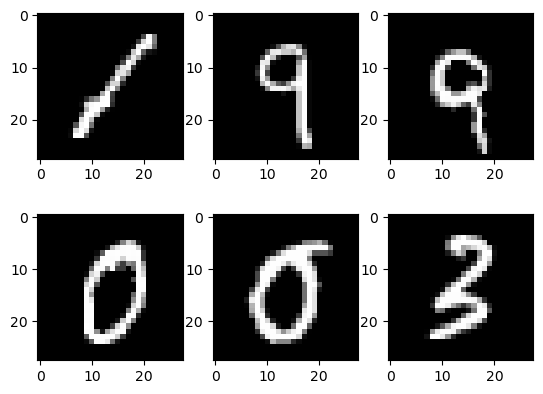

In [13]:
for i in range(6):
    plt.subplot(2,3,i+1) # 2 rows, 3 columns, i+1 is the index
    # sample[i][0] is the i-th image in the batch, 0 is the channel
    plt.imshow(sample[i][0], cmap='gray')  # cmap='gray' is for black and white
plt.show()

In [17]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

In [18]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [19]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

In [20]:
# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/2], Step [100/600], Loss: 0.5128
Epoch [1/2], Step [200/600], Loss: 0.3999
Epoch [1/2], Step [300/600], Loss: 0.2648
Epoch [1/2], Step [400/600], Loss: 0.2915
Epoch [1/2], Step [500/600], Loss: 0.2066
Epoch [1/2], Step [600/600], Loss: 0.2644
Epoch [2/2], Step [100/600], Loss: 0.2044
Epoch [2/2], Step [200/600], Loss: 0.1831
Epoch [2/2], Step [300/600], Loss: 0.1555
Epoch [2/2], Step [400/600], Loss: 0.1625
Epoch [2/2], Step [500/600], Loss: 0.1669
Epoch [2/2], Step [600/600], Loss: 0.1996


In [21]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1) # 1 is the dimension to reduce (the max of each row)
        n_samples += labels.size(0) # number of elements in the tensor
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 95.32 %
